In [1]:
import requests
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [2]:
def fetch_arxiv_papers(query, max_results=50):
    url = f"http://export.arxiv.org/api/query?search_query=all:{query}&start=0&max_results={max_results}"
    response = requests.get(url)
    papers = []
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "xml")
        entries = soup.find_all("entry")
        for entry in entries:
            papers.append({
                "title": entry.title.text,
                "summary": entry.summary.text,
                "url": entry.id.text
            })
    return papers

def fetch_ieee_papers(query, max_results=100):
    API_KEY = "your_ieee_api_key"
    URL = f"https://ieeexploreapi.ieee.org/api/v1/search/articles?querytext={query}&max_records={max_results}&apikey={API_KEY}"
    response = requests.get(URL)
    papers = []
    if response.status_code == 200:
        data = response.json()
        for item in data.get("articles", []):
            papers.append({
                "title": item.get("title", ""),
                "summary": item.get("abstract", ""),
                "url": item.get("pdf_url", "")
            })
    return papers

def analyze_risks(texts):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = vectorizer.fit_transform(texts)
    risk_scores = np.mean(tfidf_matrix.toarray(), axis=1)  # Calculate mean TF-IDF scores
    return risk_scores

def rank_iot_devices(papers):
    if not papers:
        return []
    summaries = [paper["summary"] for paper in papers]
    risk_scores = analyze_risks(summaries)
    ranked_papers = [(papers[i]["title"], papers[i]["url"], risk_scores[i]) for i in range(len(papers))]
    ranked_papers.sort(key=lambda x: x[2], reverse=True)
    return ranked_papers

if __name__ == "__main__":
    query = "IoT risk ranking advanced technology"
    arxiv_papers = fetch_arxiv_papers(query)
    ieee_papers = fetch_ieee_papers(query)
    all_papers = arxiv_papers + ieee_papers

    ranked_results = rank_iot_devices(all_papers)
    df = pd.DataFrame(ranked_results, columns=["Title", "URL", "Risk Score"])
    
    print(df)

                                               Title  \
0  An Approach To Enhance IoT Security In 6G Netw...   
1  Securing Cloud-Based Internet of Things: Chall...   
2  Assessing Risks and Modeling Threats in the In...   
3  An Overview of UPnP-based IoT Security: Threat...   
4  Ranking of different of investment risk in hig...   
5  Security Risks Concerns of Generative AI in th...   
6  A Continent-Wide Assessment of Cyber Vulnerabi...   
7  Different Applications and Technologies of Int...   
8  Future developments in cyber risk assessment f...   
9  Economic impact of IoT cyber risk -- Analysing...   

                                 URL  Risk Score  
0  http://arxiv.org/abs/2410.05310v2    0.016601  
1  http://arxiv.org/abs/2402.00356v3    0.016134  
2  http://arxiv.org/abs/2110.07771v1    0.014420  
3  http://arxiv.org/abs/2011.02587v1    0.013831  
4  http://arxiv.org/abs/2111.14665v1    0.013825  
5  http://arxiv.org/abs/2404.00139v1    0.012655  
6  http://arxiv.org/abs/23

In [3]:
def fetch_arxiv_papers(query, max_results=50):
    url = f"http://export.arxiv.org/api/query?search_query=all:{query}&start=0&max_results={max_results}"
    response = requests.get(url)
    papers = []
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "xml")
        entries = soup.find_all("entry")
        for entry in entries:
            papers.append({
                "title": entry.title.text,
                "summary": entry.summary.text,
                "url": entry.id.text
            })
    return papers

def fetch_ieee_papers(query, max_results=50):
    API_KEY = "your_ieee_api_key"
    URL = f"https://ieeexploreapi.ieee.org/api/v1/search/articles?querytext={query}&max_records={max_results}&apikey={API_KEY}"
    response = requests.get(URL)
    papers = []
    if response.status_code == 200:
        data = response.json()
        for item in data.get("articles", []):
            papers.append({
                "title": item.get("title", ""),
                "summary": item.get("abstract", ""),
                "url": item.get("pdf_url", "")
            })
    return papers

def extract_risks():
    risks = [
        "Insufficient Device Upgrades",
        "Weak Security Measures",
        "Operator Ignorance",
        "Untrustworthy Dynamic Device Discovery",
        "Denial of Service (DoS) Attacks",
        "Ransomware",
        "Man-in-the-Middle Attacks",
        "Spoofing",
        "Complexity in Management",
        "Integration with IT Networks",
        "Supply Chain Risks",
        "Physical Security Threats"
    ]
    return risks

def analyze_risks(texts):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = vectorizer.fit_transform(texts)
    risk_scores = np.mean(tfidf_matrix.toarray(), axis=1)  # Calculate mean TF-IDF scores
    return risk_scores

def rank_iot_devices(papers):
    if not papers:
        return []
    summaries = [paper["summary"] for paper in papers]
    risk_scores = analyze_risks(summaries)
    ranked_papers = [(papers[i]["title"], papers[i]["url"], risk_scores[i]) for i in range(len(papers))]
    ranked_papers.sort(key=lambda x: x[2], reverse=True)
    return ranked_papers

if __name__ == "__main__":
    query = "IoT risk ranking advanced technology"
    arxiv_papers = fetch_arxiv_papers(query)
    ieee_papers = fetch_ieee_papers(query)
    all_papers = arxiv_papers + ieee_papers

    ranked_results = rank_iot_devices(all_papers)
    df = pd.DataFrame(ranked_results, columns=["Title", "URL", "Risk Score"])
    
    print("Identified IoT Risks:")
    for risk in extract_risks():
        print(f"- {risk}")
    
    print("\nRanked Papers:")
    print(df)

Identified IoT Risks:
- Insufficient Device Upgrades
- Weak Security Measures
- Operator Ignorance
- Untrustworthy Dynamic Device Discovery
- Denial of Service (DoS) Attacks
- Ransomware
- Man-in-the-Middle Attacks
- Spoofing
- Complexity in Management
- Integration with IT Networks
- Supply Chain Risks
- Physical Security Threats

Ranked Papers:
                                                Title  \
0   Harris Hawks Feature Selection in Distributed ...   
1   Using Cloud and Fog Computing for Large Scale ...   
2   Securing Cloud-Based Internet of Things: Chall...   
3   An Overview of Machine Learning-Driven Resourc...   
4   Enhancing Cybersecurity in IoT Networks: A Dee...   
5   Security of RPL Based 6LoWPAN Networks in the ...   
6   Machine Learning Based Solutions for Security ...   
7     IoT trust and reputation: a survey and taxonomy   
8   A Social IoT-driven Pedestrian Routing Approac...   
9   Secure ambient intelligence prototype for airp...   
10  Towards an MDD Based

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

def fetch_arxiv_papers(query, max_results=50):
    url = f"http://export.arxiv.org/api/query?search_query=all:{query}&start=0&max_results={max_results}"
    response = requests.get(url)
    papers = []
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "xml")
        entries = soup.find_all("entry")
        for entry in entries:
            papers.append(entry.summary.text)
    return papers

def fetch_ieee_papers(query, max_results=50):
    API_KEY = "your_ieee_api_key"
    URL = f"https://ieeexploreapi.ieee.org/api/v1/search/articles?querytext={query}&max_records={max_results}&apikey={API_KEY}"
    response = requests.get(URL)
    papers = []
    if response.status_code == 200:
        data = response.json()
        for item in data.get("articles", []):
            papers.append(item.get("abstract", ""))
    return papers

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    return text

def extract_risks_from_texts(texts):
    categories = {
        "Security Risks": ["security", "spoofing", "maninthemiddle", "ransomware", "denial of service", "authentication", "data breach"],
        "Operational Risks": ["updates", "ignorance", "misconfiguration", "device failure", "complexity", "scalability"],
        "Integration Risks": ["integration", "supply chain", "network", "protocol", "standards"],
        "Physical Risks": ["physical", "theft", "tampering", "hardware attack"]
    }
    
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = vectorizer.fit_transform([preprocess_text(text) for text in texts])
    terms = vectorizer.get_feature_names_out()
    risk_analysis = {category: set() for category in categories}
    
    for term in terms:
        for category, risks in categories.items():
            if any(risk in term for risk in risks):
                risk_analysis[category].add(term)
    
    return risk_analysis

if __name__ == "__main__":
    query = "IoT risk advanced technology facilities"
    arxiv_texts = fetch_arxiv_papers(query)
    ieee_texts = fetch_ieee_papers(query)
    all_texts = arxiv_texts + ieee_texts

    risks_identified = extract_risks_from_texts(all_texts)
    
    print("Identified IoT Risks by Category:")
    for category, risks in risks_identified.items():
        print(f"\n{category}:")
        if risks:
            for risk in risks:
                print(f"- {risk}")
        else:
            print("- No risks found in this category")

Identified IoT Risks by Category:

Security Risks:
- security
- authentication
- cybersecurity

Operational Risks:
- complexity
- scalability

Integration Risks:
- protocols
- standards
- integration
- networking
- protocol
- network
- networks

Physical Risks:
- physical


Identified IoT Risks by Category:

Security Risks:
- security
- authentication
- cybersecurity

Operational Risks:
- complexity
- scalability

Integration Risks:
- protocols
- standards
- integration
- networking
- protocol
- network
- networks

Physical Risks:
- physical


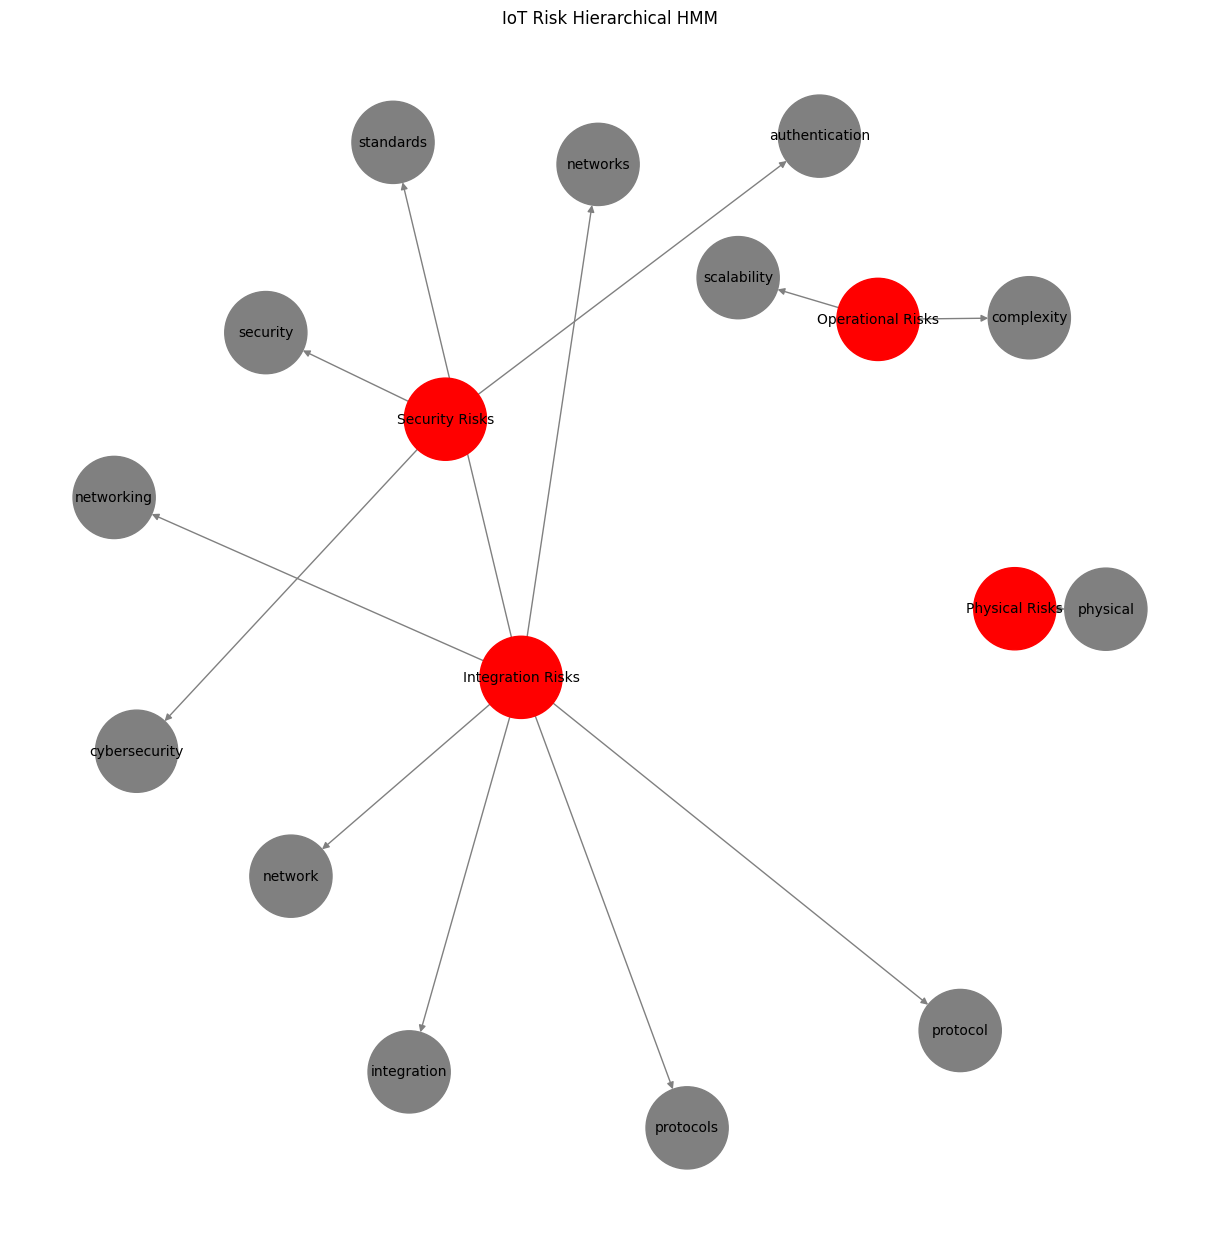

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

def fetch_arxiv_papers(query, max_results=50):
    url = f"http://export.arxiv.org/api/query?search_query=all:{query}&start=0&max_results={max_results}"
    response = requests.get(url)
    papers = []
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "xml")
        entries = soup.find_all("entry")
        for entry in entries:
            papers.append(entry.summary.text)
    return papers

def fetch_ieee_papers(query, max_results=50):
    API_KEY = "your_ieee_api_key"
    URL = f"https://ieeexploreapi.ieee.org/api/v1/search/articles?querytext={query}&max_records={max_results}&apikey={API_KEY}"
    response = requests.get(URL)
    papers = []
    if response.status_code == 200:
        data = response.json()
        for item in data.get("articles", []):
            papers.append(item.get("abstract", ""))
    return papers

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    return text

def extract_risks_from_texts(texts):
    categories = {
        "Security Risks": ["security", "spoofing", "maninthemiddle", "ransomware", "denial of service", "authentication", "data breach"],
        "Operational Risks": ["updates", "ignorance", "misconfiguration", "device failure", "complexity", "scalability"],
        "Integration Risks": ["integration", "supply chain", "network", "protocol", "standards"],
        "Physical Risks": ["physical", "theft", "tampering", "hardware attack"]
    }
    
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = vectorizer.fit_transform([preprocess_text(text) for text in texts])
    terms = vectorizer.get_feature_names_out()
    risk_analysis = {category: set() for category in categories}
    
    for term in terms:
        for category, risks in categories.items():
            if any(risk in term for risk in risks):
                risk_analysis[category].add(term)
    
    return risk_analysis

def generate_hhm(risk_analysis):
    G = nx.DiGraph()
    for category, risks in risk_analysis.items():
        G.add_node(category, color='red')
        for risk in risks:
            G.add_edge(category, risk)
    
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    colors = ['red' if node in risk_analysis else 'gray' for node in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=colors, edge_color='gray', node_size=3500, font_size=10)
    plt.title("IoT Risk Hierarchical HMM")
    plt.show()

if __name__ == "__main__":
    query = "IoT risk advanced technology facilities"
    arxiv_texts = fetch_arxiv_papers(query)
    ieee_texts = fetch_ieee_papers(query)
    all_texts = arxiv_texts + ieee_texts

    risks_identified = extract_risks_from_texts(all_texts)
    
    print("Identified IoT Risks by Category:")
    for category, risks in risks_identified.items():
        print(f"\n{category}:")
        if risks:
            for risk in risks:
                print(f"- {risk}")
        else:
            print("- No risks found in this category")
    
    generate_hhm(risks_identified)


In [6]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.1 MB/s eta 0:00:00


Identified IoT Risks by Category:

Security Risks:
- security
- authentication
- cybersecurity

Operational Risks:
- complexity
- scalability

Integration Risks:
- protocols
- standards
- integration
- networking
- protocol
- network
- networks

Physical Risks:
- physical


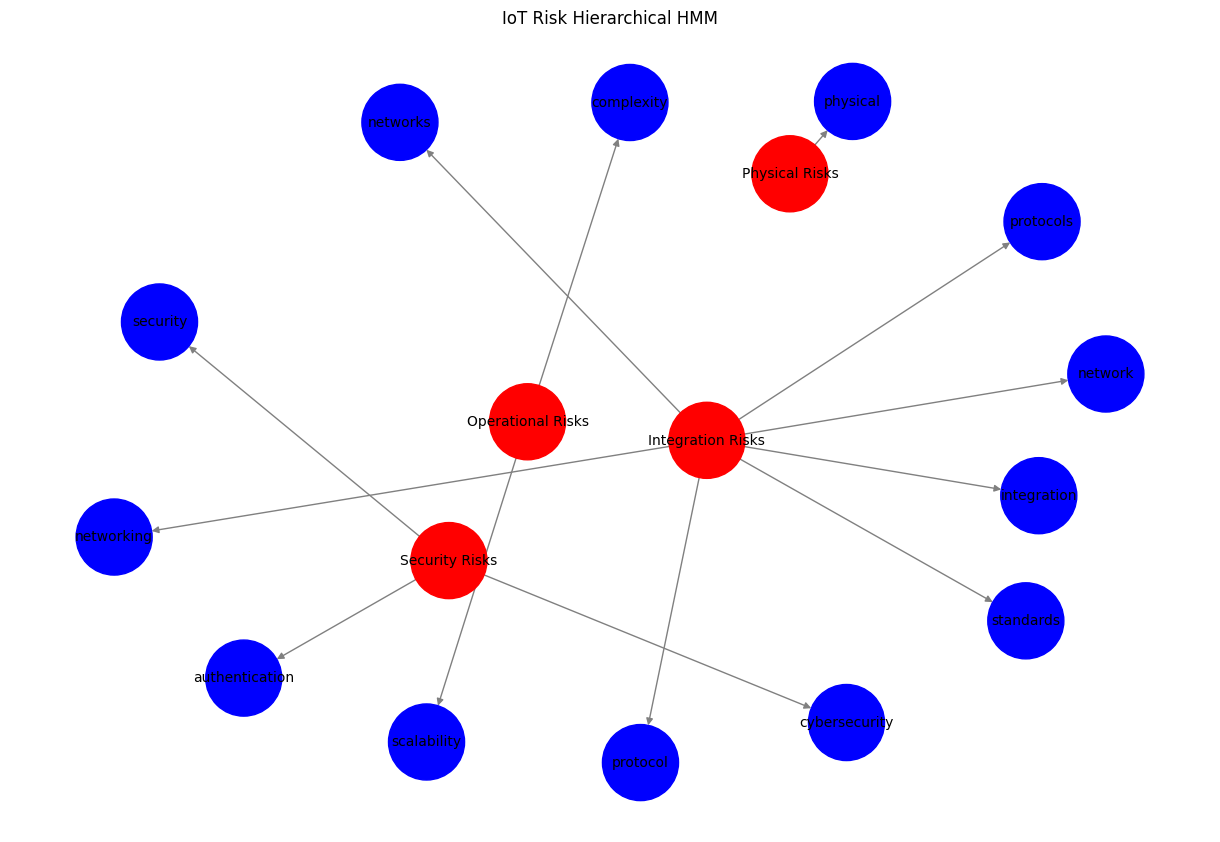

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

def fetch_arxiv_papers(query, max_results=50):
    url = f"http://export.arxiv.org/api/query?search_query=all:{query}&start=0&max_results={max_results}"
    response = requests.get(url)
    papers = []
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "xml")
        entries = soup.find_all("entry")
        for entry in entries:
            papers.append(entry.summary.text.strip())
    return papers

def fetch_ieee_papers(query, max_results=50):
    API_KEY = "your_ieee_api_key"
    URL = f"https://ieeexploreapi.ieee.org/api/v1/search/articles?querytext={query}&max_records={max_results}&apikey={API_KEY}"
    response = requests.get(URL)
    papers = []
    if response.status_code == 200:
        data = response.json()
        for item in data.get("articles", []):
            papers.append(item.get("abstract", "").strip())
    return papers

def preprocess_texts(texts):
    return [re.sub(r'[^a-zA-Z0-9\s]', '', text.lower()) for text in texts if text.strip()]

def extract_risks_from_texts(texts):
    if not texts:
        return {}
    
    categories = {
        "Security Risks": ["security", "spoofing", "maninthemiddle", "ransomware", "denial of service", "authentication", "data breach"],
        "Operational Risks": ["updates", "ignorance", "misconfiguration", "device failure", "complexity", "scalability"],
        "Integration Risks": ["integration", "supply chain", "network", "protocol", "standards"],
        "Physical Risks": ["physical", "theft", "tampering", "hardware attack"]
    }
    
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    processed_texts = preprocess_texts(texts)
    tfidf_matrix = vectorizer.fit_transform(processed_texts)
    terms = vectorizer.get_feature_names_out()
    risk_analysis = {category: set() for category in categories}
    
    for term in terms:
        for category, risks in categories.items():
            if any(risk in term for risk in risks):
                risk_analysis[category].add(term)
    
    return risk_analysis

def generate_hhm(risk_analysis):
    G = nx.DiGraph()
    for category, risks in risk_analysis.items():
        G.add_node(category, color='red')
        for risk in risks:
            G.add_edge(category, risk)
    
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    colors = ['red' if node in risk_analysis else 'blue' for node in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=colors, edge_color='gray', node_size=3000, font_size=10)
    plt.title("IoT Risk Hierarchical HMM")
    plt.show()

def build_gnn(graph):
    node_mapping = {node: i for i, node in enumerate(graph.nodes)}
    edges = [(node_mapping[u], node_mapping[v]) for u, v in graph.edges]
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    x = torch.eye(len(graph.nodes), dtype=torch.float)
    
    data = Data(x=x, edge_index=edge_index)
    
    class GCN(nn.Module):
        def __init__(self, in_channels, hidden_channels, out_channels):
            super().__init__()
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)
        
        def forward(self, data):
            x, edge_index = data.x, data.edge_index
            x = self.conv1(x, edge_index).relu()
            x = self.conv2(x, edge_index)
            return x
    
    model = GCN(in_channels=len(graph.nodes), hidden_channels=16, out_channels=4)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()
    
    return model, data, optimizer, loss_fn

if __name__ == "__main__":
    query = "IoT risk advanced technology facilities"
    arxiv_texts = fetch_arxiv_papers(query)
    ieee_texts = fetch_ieee_papers(query)
    all_texts = arxiv_texts + ieee_texts

    risks_identified = extract_risks_from_texts(all_texts)
    
    print("Identified IoT Risks by Category:")
    for category, risks in risks_identified.items():
        print(f"\n{category}:")
        if risks:
            for risk in risks:
                print(f"- {risk}")
        else:
            print("- No risks found in this category")
    
    if risks_identified:
        generate_hhm(risks_identified)
        model, data, optimizer, loss_fn = build_gnn(nx.DiGraph(risks_identified))


Identified IoT Risks by Category:

Security Risks:
- authentication

Operational Risks:
- complexity
- scalability

Integration Risks:
- No risks found in this category

Physical Risks:
- No risks found in this category


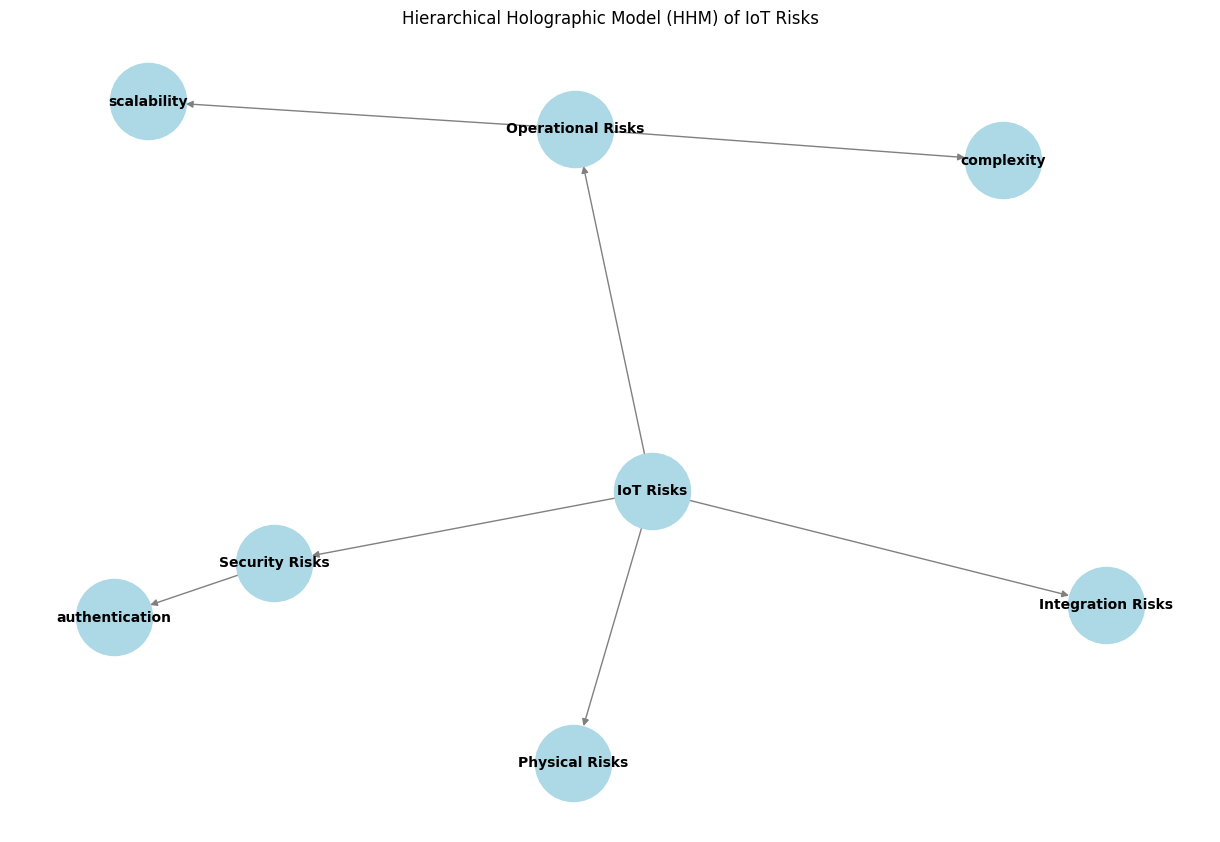

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

# Fetch arXiv papers
def fetch_arxiv_papers(query, max_results=50):
    url = f"http://export.arxiv.org/api/query?search_query=all:{query}&start=0&max_results={max_results}"
    response = requests.get(url)
    papers = []
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "xml")
        entries = soup.find_all("entry")
        for entry in entries:
            papers.append(entry.summary.text)
    return papers

# Fetch IEEE papers
def fetch_ieee_papers(query, max_results=50):
    API_KEY = "your_ieee_api_key"
    URL = f"https://ieeexploreapi.ieee.org/api/v1/search/articles?querytext={query}&max_records={max_results}&apikey={API_KEY}"
    response = requests.get(URL)
    papers = []
    if response.status_code == 200:
        data = response.json()
        for item in data.get("articles", []):
            papers.append(item.get("abstract", ""))
    return papers

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    return text

# Extract risks and construct HHM
def extract_risks_from_texts(texts):
    categories = {
        "Security Risks": ["weak security measures", "spoofing", "man-in-the-middle attacks", "ransomware", "denial of service", "authentication", "data breach"],
        "Operational Risks": ["insufficient device upgrades", "operator ignorance", "misconfiguration", "device failure", "complexity", "scalability"],
        "Integration Risks": ["untrustworthy device discovery", "integration with IT networks", "supply chain vulnerabilities", "protocol issues", "standards non-compliance"],
        "Physical Risks": ["physical security threats", "hardware tampering", "theft", "environmental vulnerabilities"]
    }
    
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = vectorizer.fit_transform([preprocess_text(text) for text in texts])
    terms = vectorizer.get_feature_names_out()
    risk_analysis = {category: set() for category in categories}
    
    for term in terms:
        for category, risks in categories.items():
            if any(risk in term for risk in risks):
                risk_analysis[category].add(term)
    
    return risk_analysis

# Build Hierarchical Holographic Model (HHM)
def build_hhm(risk_analysis):
    G = nx.DiGraph()
    G.add_node("IoT Risks")
    
    for category, risks in risk_analysis.items():
        G.add_node(category)
        G.add_edge("IoT Risks", category)
        for risk in risks:
            G.add_node(risk)
            G.add_edge(category, risk)
    
    return G

# Visualize HHM
def visualize_hhm(G):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold")
    plt.title("Hierarchical Holographic Model (HHM) of IoT Risks")
    plt.show()

if __name__ == "__main__":
    query = "IoT risk advanced technology facilities"
    arxiv_texts = fetch_arxiv_papers(query)
    ieee_texts = fetch_ieee_papers(query)
    all_texts = arxiv_texts + ieee_texts

    risks_identified = extract_risks_from_texts(all_texts)
    hhm_graph = build_hhm(risks_identified)
    
    print("Identified IoT Risks by Category:")
    for category, risks in risks_identified.items():
        print(f"\n{category}:")
        if risks:
            for risk in risks:
                print(f"- {risk}")
        else:
            print("- No risks found in this category")
    
    visualize_hhm(hhm_graph)



Identified IoT Risks by Category:

Security Risks:
  Network Security:
    - No risks found in this subcategory
  Data Security:
    - No risks found in this subcategory

Operational Risks:
  System Failures:
    - No risks found in this subcategory
  Human Factors:
    - No risks found in this subcategory

Integration Risks:
  Interoperability:
    - No risks found in this subcategory
  Supply Chain:
    - No risks found in this subcategory

Physical Risks:
  Hardware Attacks:
    - No risks found in this subcategory
  Environmental Risks:
    - No risks found in this subcategory


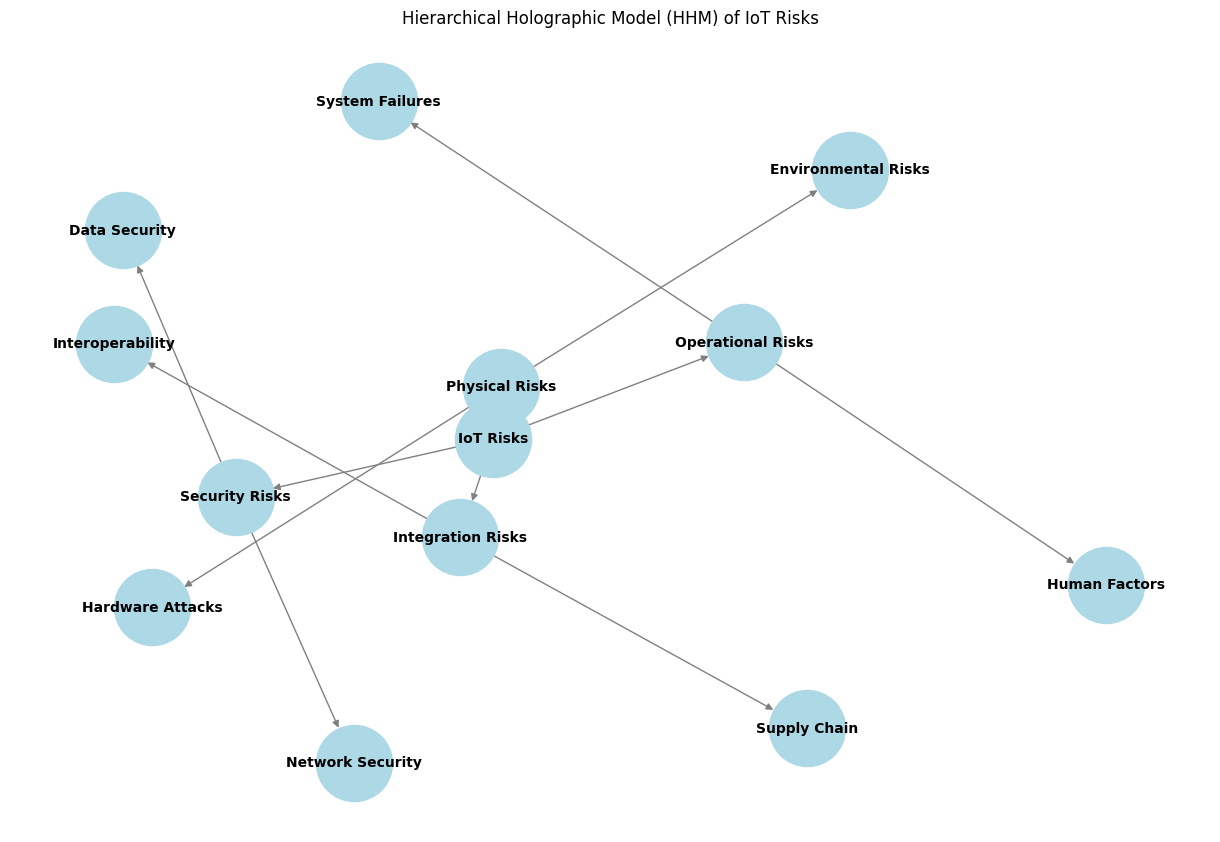

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

# Fetch arXiv papers
def fetch_arxiv_papers(query, max_results=50):
    url = f"http://export.arxiv.org/api/query?search_query=all:{query}&start=0&max_results={max_results}"
    response = requests.get(url)
    papers = []
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "xml")
        entries = soup.find_all("entry")
        for entry in entries:
            papers.append(entry.summary.text)
    return papers

# Fetch IEEE papers
def fetch_ieee_papers(query, max_results=50):
    API_KEY = "your_ieee_api_key"
    URL = f"https://ieeexploreapi.ieee.org/api/v1/search/articles?querytext={query}&max_records={max_results}&apikey={API_KEY}"
    response = requests.get(URL)
    papers = []
    if response.status_code == 200:
        data = response.json()
        for item in data.get("articles", []):
            papers.append(item.get("abstract", ""))
    return papers

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    return text

# Extract risks and construct HHM
def extract_risks_from_texts(texts):
    hierarchy = {
        "IoT Risks": {
            "Security Risks": {
                "Network Security": ["spoofing", "man-in-the-middle attacks", "denial of service"],
                "Data Security": ["ransomware", "data breach", "authentication flaws"]
            },
            "Operational Risks": {
                "System Failures": ["insufficient device upgrades", "device failure", "misconfiguration"],
                "Human Factors": ["operator ignorance", "complexity in management", "scalability issues"]
            },
            "Integration Risks": {
                "Interoperability": ["protocol issues", "standards non-compliance"],
                "Supply Chain": ["untrustworthy device discovery", "supply chain vulnerabilities"]
            },
            "Physical Risks": {
                "Hardware Attacks": ["hardware tampering", "theft"],
                "Environmental Risks": ["environmental vulnerabilities", "physical security threats"]
            }
        }
    }
    
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = vectorizer.fit_transform([preprocess_text(text) for text in texts])
    terms = vectorizer.get_feature_names_out()
    
    risk_analysis = {category: {} for category in hierarchy["IoT Risks"]}
    
    for category, subcategories in hierarchy["IoT Risks"].items():
        for subcategory, risks in subcategories.items():
            risk_analysis[category][subcategory] = set()
            for term in terms:
                if any(risk in term for risk in risks):
                    risk_analysis[category][subcategory].add(term)
    
    return risk_analysis

# Build Hierarchical Holographic Model (HHM)
def build_hhm(risk_analysis):
    G = nx.DiGraph()
    G.add_node("IoT Risks")
    
    for category, subcategories in risk_analysis.items():
        G.add_node(category)
        G.add_edge("IoT Risks", category)
        for subcategory, risks in subcategories.items():
            G.add_node(subcategory)
            G.add_edge(category, subcategory)
            for risk in risks:
                G.add_node(risk)
                G.add_edge(subcategory, risk)
    
    return G

# Visualize HHM
def visualize_hhm(G):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold")
    plt.title("Hierarchical Holographic Model (HHM) of IoT Risks")
    plt.show()

if __name__ == "__main__":
    query = "IoT risk advanced technology facilities"
    arxiv_texts = fetch_arxiv_papers(query)
    ieee_texts = fetch_ieee_papers(query)
    all_texts = arxiv_texts + ieee_texts

    risks_identified = extract_risks_from_texts(all_texts)
    hhm_graph = build_hhm(risks_identified)
    
    print("Identified IoT Risks by Category:")
    for category, subcategories in risks_identified.items():
        print(f"\n{category}:")
        for subcategory, risks in subcategories.items():
            print(f"  {subcategory}:")
            if risks:
                for risk in risks:
                    print(f"    - {risk}")
            else:
                print("    - No risks found in this subcategory")
    
    visualize_hhm(hhm_graph)